In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_excel('Sample - Superstore.xls')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [6]:
df['Country/Region'].nunique()

1

In [7]:
df.drop(columns = ['Country/Region'],inplace = True)

In [8]:
df.drop(columns = ['Row ID', 'Order ID'],inplace = True)

In [9]:
df.drop(columns = ['Postal Code'],inplace = True)

<AxesSubplot:ylabel='Category'>

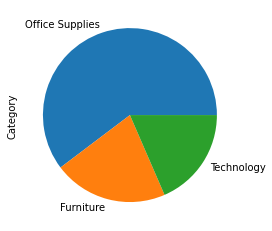

In [10]:
df['Category'].value_counts().plot(kind = 'pie')

In [11]:
df.groupby('Category')['Sub-Category'].value_counts()

Category         Sub-Category
Furniture        Furnishings      957
                 Chairs           617
                 Tables           319
                 Bookcases        228
Office Supplies  Binders         1523
                 Paper           1370
                 Storage          846
                 Art              796
                 Appliances       466
                 Labels           364
                 Envelopes        254
                 Fasteners        217
                 Supplies         190
Technology       Phones           889
                 Accessories      775
                 Machines         115
                 Copiers           68
Name: Sub-Category, dtype: int64

In [12]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [15]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
df['month']=df['Order Date'].dt.month

In [17]:
df['year'] = df['Order Date'].dt.year

<AxesSubplot:xlabel='year,month'>

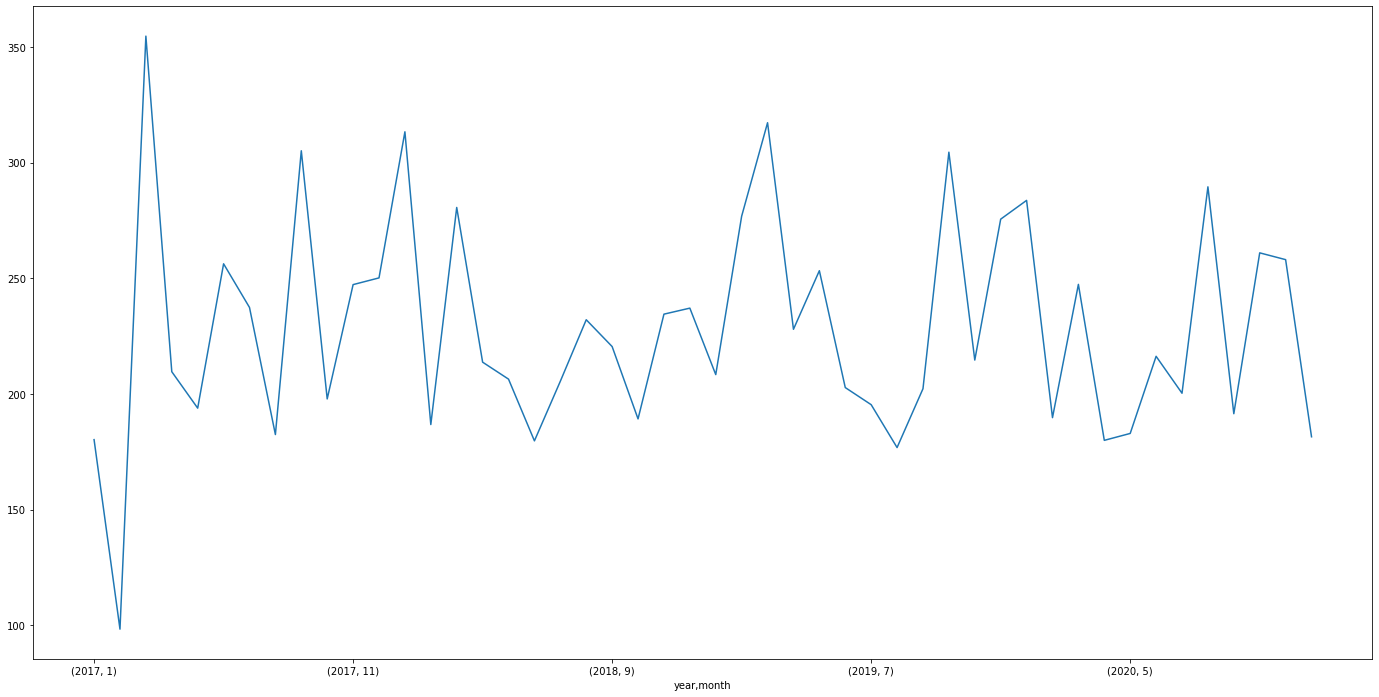

In [18]:
df.groupby(['year','month'])['Sales'].mean().plot(figsize = (24,12))

<AxesSubplot:xlabel='year,month'>

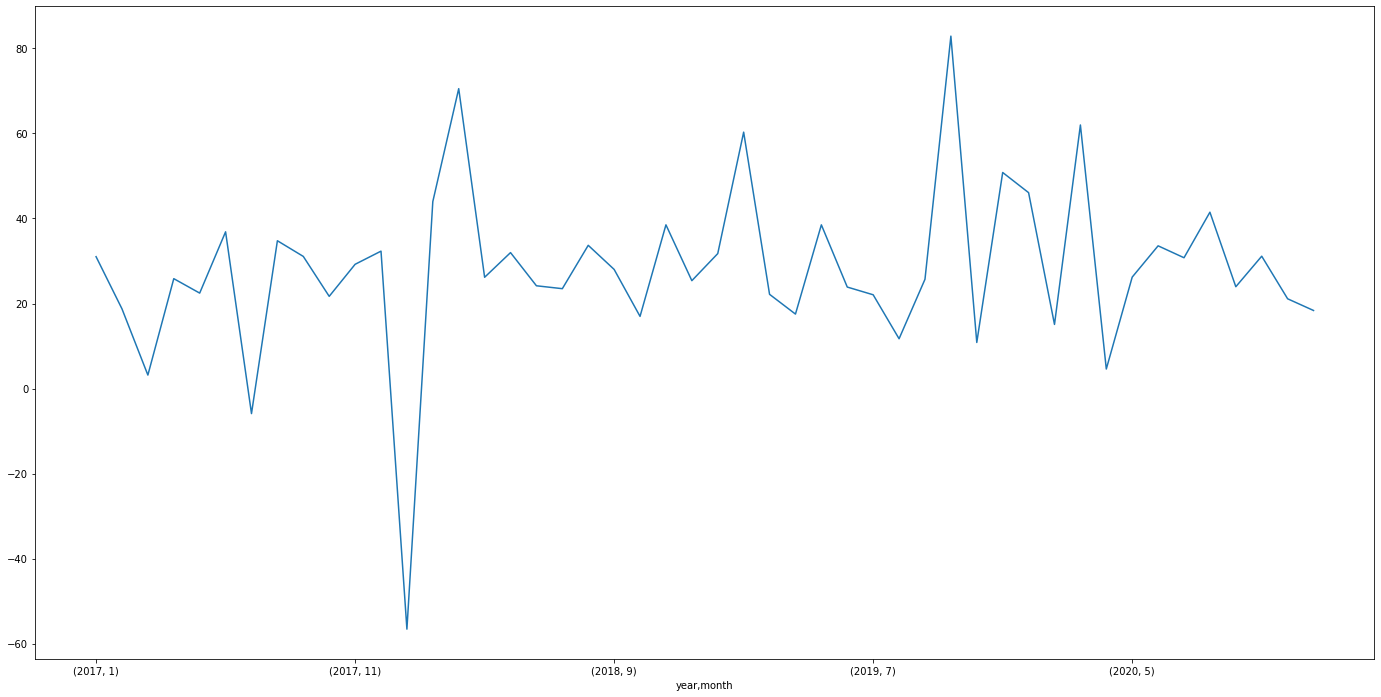

In [19]:
df.groupby(['year','month'])['Profit'].mean().plot(figsize = (24,12))

<AxesSubplot:xlabel='Category'>

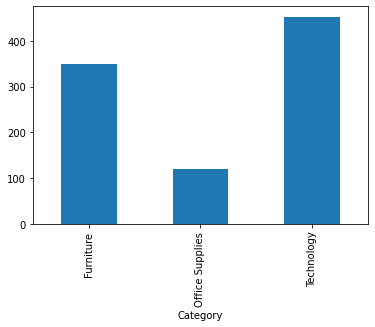

In [20]:
df.groupby('Category')['Sales'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Category'>

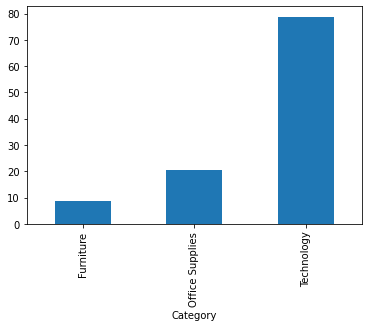

In [21]:
df.groupby('Category')['Profit'].mean().plot(kind = 'bar')

In [22]:
def func():
    for c in df['Category'].unique():
        df[df['Category'] == c].groupby(['Category','Sub-Category'])['Sales'].mean().sort_values(ascending = False).plot(kind = 'bar', subplots = True)
        plt.show()
    


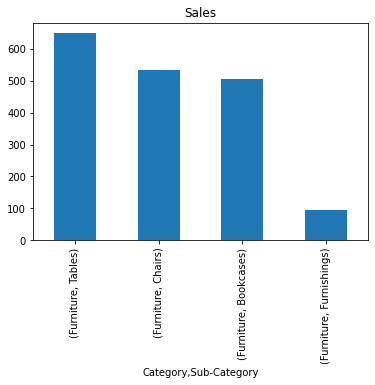

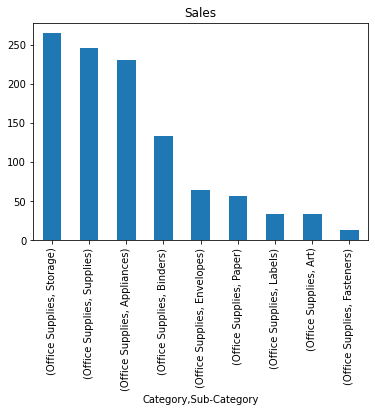

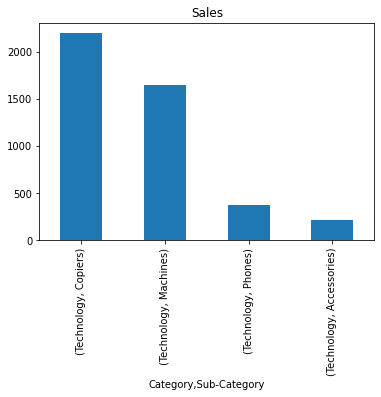

In [23]:
func()

In [24]:
def func2():
    for c in df['Category'].unique():
        df[df['Category'] == c].groupby(['Category','Sub-Category'])['Profit'].mean().sort_values(ascending = False).plot(kind = 'bar', subplots = True)
        plt.show()
    


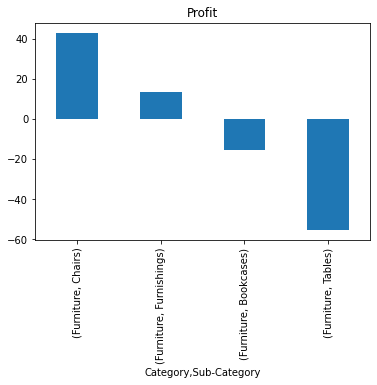

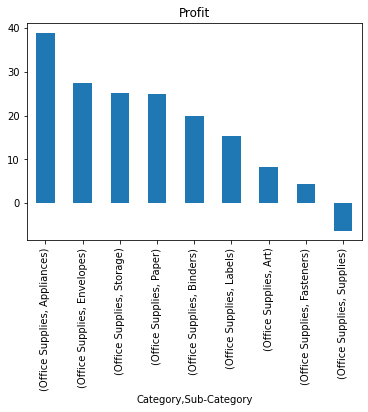

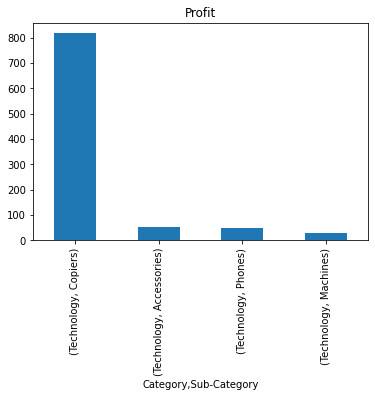

In [25]:
func2()

<AxesSubplot:xlabel='Segment'>

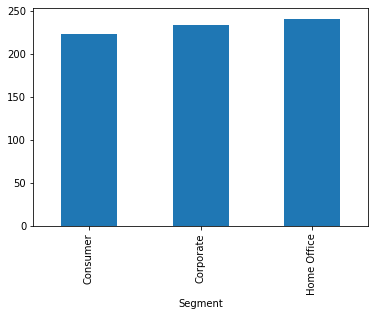

In [26]:
df.groupby('Segment')['Sales'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Segment'>

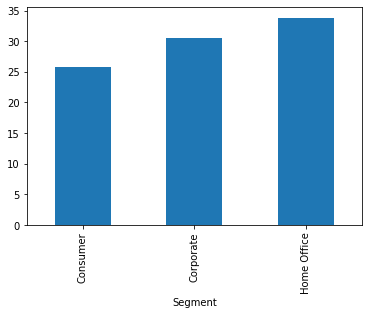

In [27]:
df.groupby('Segment')['Profit'].mean().plot(kind = 'bar')

In [28]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year
0,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2019
1,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2019
2,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2019
3,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2018
4,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2018


In [48]:
df2 = df.groupby(['Category','Sub-Category','Product Name'])['Profit'].mean().sort_values().head(30)

Category         Sub-Category  Product Name                                                                
Technology       Machines      Cubify CubeX 3D Printer Triple Head Print                                      -3839.990400
                               Cubify CubeX 3D Printer Double Head Print                                      -2959.990133
                               Cisco TelePresence System EX90 Videoconferencing Unit                          -1811.078400
                               Lexmark MX611dhe Monochrome Laser Printer                                      -1147.493250
                               Zebra GK420t Direct Thermal/Thermal Transfer Printer                            -938.280000
Furniture        Tables        Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                        -575.223120
Technology       Machines      Epson TM-T88V Direct Thermal Printer - Monochrome - Desktop                     -528.615000
Furniture        Tables        

In [45]:
df.groupby(['Category','Sub-Category','Product Name'])['Profit'].mean().sort_values(ascending = False).head(10)

Category         Sub-Category  Product Name                                                         
Technology       Copiers       Canon imageCLASS 2200 Advanced Copier                                    5039.985600
                 Machines      Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    1995.990000
                               Ativa V4110MDD Micro-Cut Shredder                                        1886.473050
                               3D Systems Cube Printer, 2nd Generation, Magenta                         1858.985700
                               Zebra ZM400 Thermal Label Printer                                        1671.768000
                               Hewlett-Packard Desktjet 6988DT Refurbished Printer                      1668.205000
                               Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer            1459.200000
                               HP Designjet T520 Inkjet Large Format Printer - 24" Colo

<AxesSubplot:xlabel='year,month'>

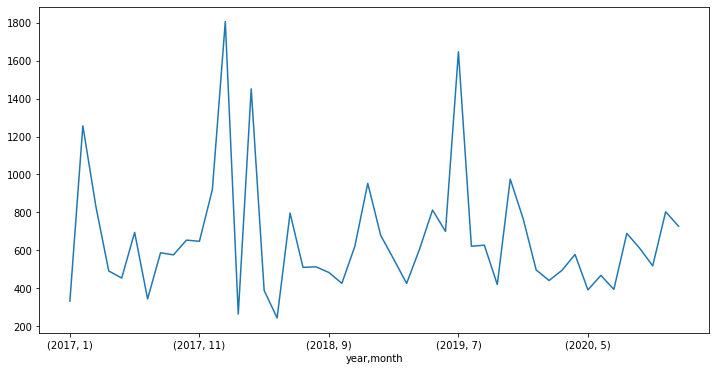

In [31]:
df[df['Sub-Category']=='Tables'].groupby(['year','month'])['Sales'].mean().plot(figsize = (12,6))

<AxesSubplot:xlabel='year,month'>

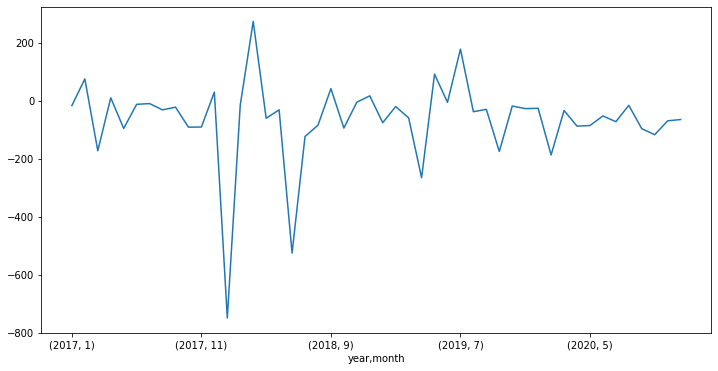

In [32]:
df[df['Sub-Category']=='Tables'].groupby(['year','month'])['Profit'].mean().plot(figsize = (12,6))

In [33]:
df.groupby(['Sub-Category'])['Profit'].mean().sort_values().head(10)

Sub-Category
Tables        -55.565771
Bookcases     -15.230509
Supplies       -6.258418
Fasteners       4.375660
Art             8.200737
Furnishings    13.645918
Labels         15.236962
Binders        19.843574
Paper          24.856620
Storage        25.152277
Name: Profit, dtype: float64

In [41]:
df.groupby(['Sub-Category'])['Profit'].mean().sort_values(ascending = False).head(10)

Sub-Category
Copiers        817.909190
Accessories     54.111788
Phones          50.073938
Chairs          43.095894
Appliances      38.922758
Machines        29.432669
Envelopes       27.418019
Storage         25.152277
Paper           24.856620
Binders         19.843574
Name: Profit, dtype: float64

In [34]:
df.groupby(['Region'])['Sales'].mean()

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

In [35]:
df.groupby(['Region'])['Profit'].mean()

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year'>

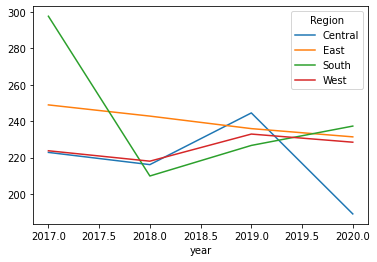

In [36]:
df.groupby(['year','Region'])['Sales'].mean().unstack().plot()

In [42]:
df.groupby(['State'])['Profit'].mean().sort_values().head(10)

State
Ohio             -36.186304
Colorado         -35.867351
North Carolina   -30.083985
Tennessee        -29.189583
Pennsylvania     -26.507598
Texas            -26.121174
Illinois         -25.625787
Arizona          -15.303235
Oregon            -9.600569
Florida           -8.875461
Name: Profit, dtype: float64

In [43]:
df.groupby(['State'])['Profit'].mean().sort_values(ascending = False).head(10)

State
Vermont                 204.088936
Rhode Island            130.100523
Indiana                 123.375411
Montana                 122.221900
Minnesota               121.608847
District of Columbia    105.958930
Delaware                103.930988
Wyoming                 100.196000
Missouri                 97.518341
Michigan                 95.934069
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year,month'>

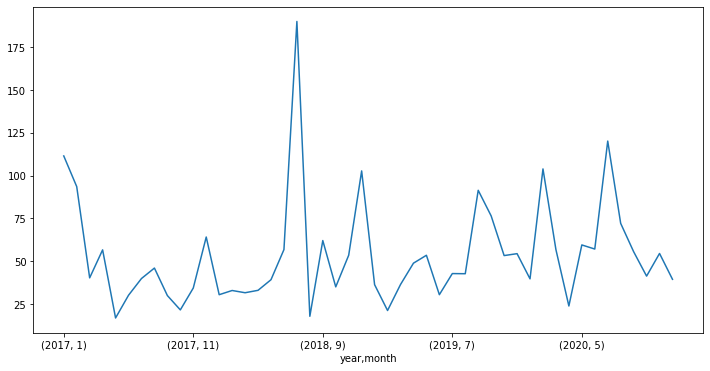

In [38]:
df[df['Sub-Category']=='Accessories'].groupby(['year','month'])['Profit'].mean().plot(figsize = (12,6))

<AxesSubplot:xlabel='year,month'>

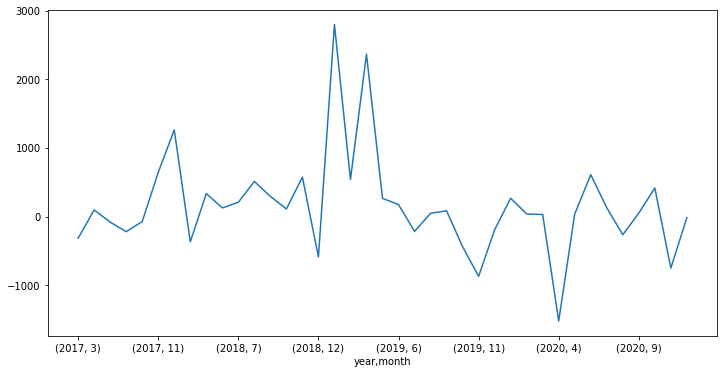

In [46]:
df[df['Sub-Category']=='Machines'].groupby(['year','month'])['Profit'].mean().plot(figsize = (12,6))